In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Moment
- 대상을 구분할 수 있는 특징
- Area, Perimeter, 중심점 등
- 대상을 구분한 후, 다른 대상과 구분하기 위해 대상을 설명하는 자료로 사용

In [2]:
img = cv2.imread('src/image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
M = cv2.moments(cnt)

M

{'m00': 2458239.0,
 'm10': 2358680320.5,
 'm01': 1574502079.5,
 'm20': 3017538356693.0,
 'm11': 1510734745280.25,
 'm02': 1344624775893.0,
 'm30': 4342992079870400.0,
 'm21': 1932733317461866.8,
 'm12': 1290167472469333.5,
 'm03': 1291848253439199.8,
 'mu20': 754384589173.25,
 'mu11': 0.0,
 'mu02': 336156193973.25,
 'mu30': 0.0,
 'mu21': 0.125,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.1248373666406453,
 'nu11': 0.0,
 'nu02': 0.05562793121417404,
 'nu30': 0.0,
 'nu21': 1.3193188022042396e-17,
 'nu12': 0.0,
 'nu03': 0.0}

## Contour 중심

In [3]:
# contour의 중심
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

959 640


## Contour Area

In [4]:
# 면적
print(cv2.contourArea(cnt))
print(M['m00'])

2458239.0
2458239.0


## Contour Perimeter

In [5]:
# 2nd argument == True : 폐곡선 둘레, o.w. 열린 곡선
print(cv2.arcLength(cnt, True))
print(cv2.arcLength(cnt, False))

6400.0
4481.0


## Contour Approximation
- finContours()에서 찾은 Contour line의 Point 수를 줄여 근사한 Line을 그릴 때 사용         

`cv2.approxPolyDP(curve, epsilon, closed[, approxCurve])`   
- curve : contour point array   
- epsilon : original curve와 근사치의 최대 거리   
- closed : 폐곡선 여부

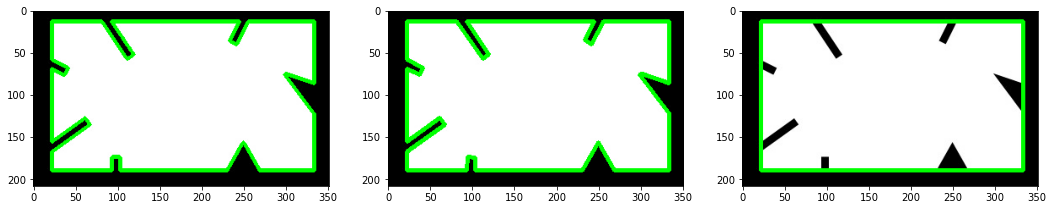

In [6]:
img = cv2.imread('src/contour.jpg')
img1 = img.copy()
img2 = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 100, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

epsilon1 = 0.001 *cv2.arcLength(cnt, True)
epsilon2 = 0.1*cv2.arcLength(cnt, True)

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)

cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
cv2.drawContours(img1, [approx1], 0, (0,255,0), 3)
cv2.drawContours(img2, [approx2], 0, (0,255,0), 3)
plt.figure(figsize = (18,12))
plt.subplot(131);plt.imshow(img)
plt.subplot(132);plt.imshow(img1)
plt.subplot(133);plt.imshow(img2)
plt.show()

## Convex Hull

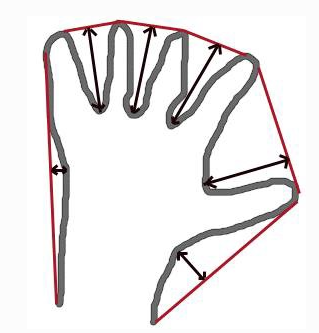
- 붉은 선 : Convel Hull
- 화살표 : Convexity defect

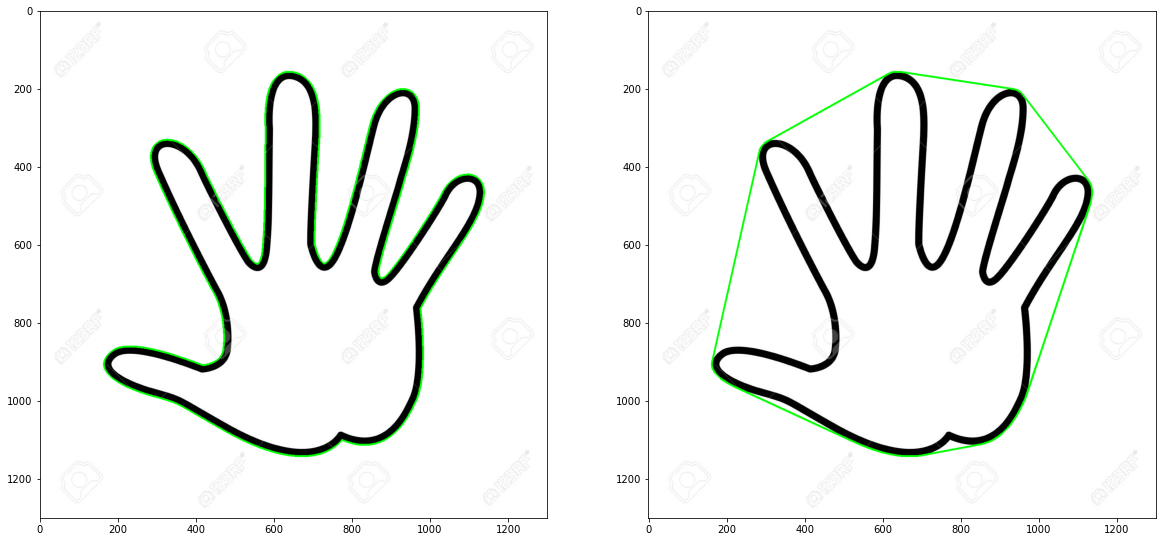

In [7]:
img = cv2.imread('src/hand.jpg')
img1 = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
hull = cv2.convexHull(cnt)

cv2.drawContours(img, [cnt],0, (0,255,0), 3)
cv2.drawContours(img1, [hull],0, (0,255,0), 3)

plt.figure(figsize = (20,12))
plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(img1)

## Checking Convexity
- Contour가 Convex인지

In [8]:
print(cv2.isContourConvex(contours[0])) # 이미지 전체 외곽선 ( 사각형 )
print(cv2.isContourConvex(contours[1])) # 손 모양의 외곽선

True
False


## Bounding Rectangle

### Staright Bounding Rectangle

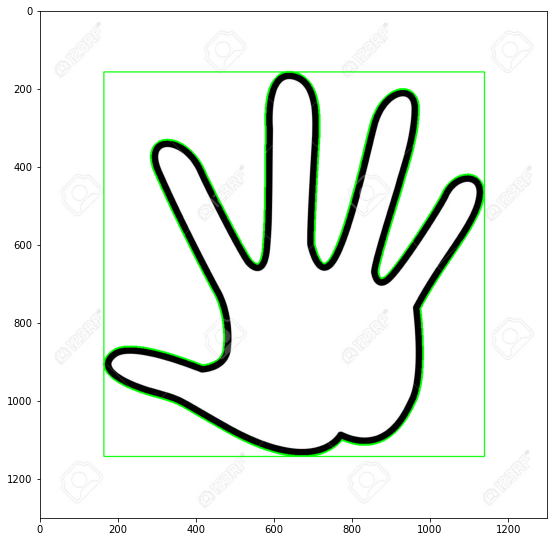

In [9]:
plt.figure(figsize = (20,12))

x,y,w,h = cv2.boundingRect(cnt)
sbr = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
plt.subplot(121);plt.imshow(sbr)

### Rotated Rectangle

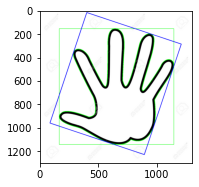

In [10]:


rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
rr = cv2.drawContours(img, [box], 0, (0,0,255), 3)
plt.subplot(122);plt.imshow(rr)

plt.show()

## Minimum Enclosing Circle

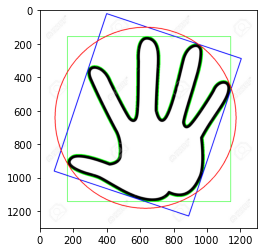

In [11]:
(x,y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cb = cv2.circle(img, center, radius, (255,0,0),3)
plt.imshow(cb)

## Fitting an Ellipse

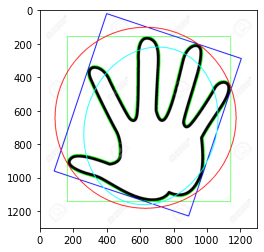

In [12]:
ellipse = cv2.fitEllipse(cnt)
eb = cv2.ellipse(img,ellipse,(0,255,255),3)
plt.imshow(eb)